<h1><center>Laboratorio 6: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Benjamín Farías
- Nombre de alumno 2: Jordán Pérez


### **Link de repositorio de GitHub:** `https://github.com/IsaacJordan-bit/Laboratorio-de-programaci-n-cientifica/tree/main/Laboratorios`


## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 60.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 56.0 MB/s eta 0:00:00
  Attempting uninstall:

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = "/content/drive/MyDrive/Noveno semestre/Laboratorio de programación/lab6/"
except: 
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas.

Para esto, el área de ventas les entrega el archivo `online_retail_II.pickle` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [3]:
df_retail = pd.read_pickle(path+"online_retail_II.pickle")

In [4]:
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df_retail = pd.read_pickle(path+"online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
df_retail.shape

(525461, 8)

In [7]:
df_retail.isna().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [8]:
df_retail.describe()

,Quantity,InvoiceDate,Price
count,525461.000000,525461,525461.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834
min,-9600.000000,2009-12-01 07:45:00,-53594.360000
25%,1.000000,2010-03-21 12:20:00,1.250000
50%,3.000000,2010-07-06 09:51:00,2.100000
75%,10.000000,2010-10-15 12:45:00,4.210000
max,19152.000000,2010-12-09 20:01:00,25111.090000
std,107.424110,NaN,146.126914


#### Algunas visualizaciones propias

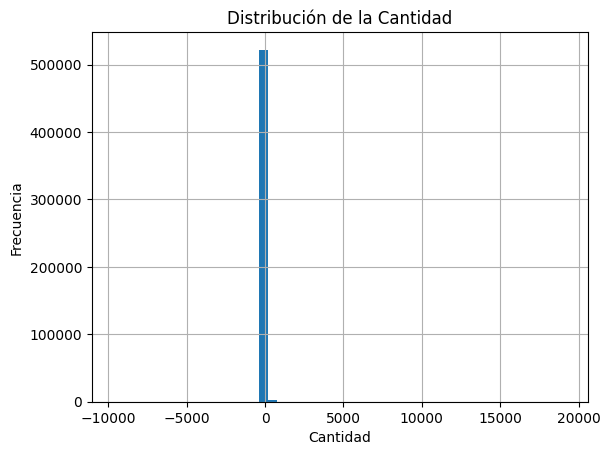

In [101]:
df_retail.Quantity.hist(bins=50)
plt.title("Distribución de la Cantidad")
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")
plt.show()

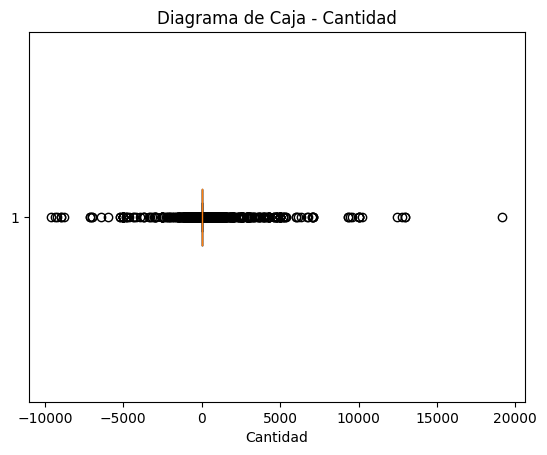

In [102]:
fig, ax = plt.subplots()

ax.boxplot(df_retail.Quantity, vert=False)
plt.title("Diagrama de Caja - Cantidad")
plt.xlabel("Cantidad")
plt.ylabel("")

plt.show()

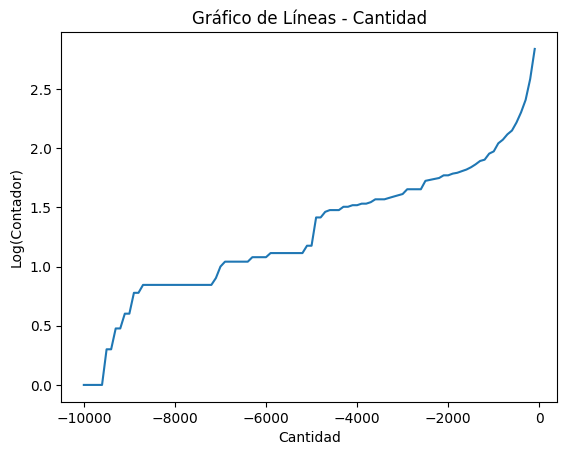

In [103]:
fig, ax = plt.subplots()

xc = np.arange(-1e4, 0, 1e2)
acc = np.array([len(df_retail[df_retail.Quantity < x]) for x in xc])
ax.plot(xc, np.log10(acc+1))

plt.title("Gráfico de Líneas - Cantidad")
plt.xlabel("Cantidad")
plt.ylabel("Log(Contador)")

plt.show()

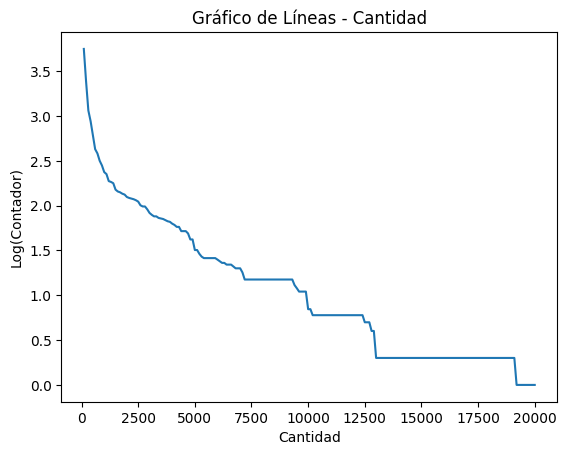

In [104]:
fig, ax = plt.subplots()

xc = np.arange(2e4, 0, -1e2)
acc = np.array([len(df_retail[df_retail.Quantity > x]) for x in xc])
ax.plot(xc, np.log10(acc+1))
plt.title("Gráfico de Líneas - Cantidad")
plt.xlabel("Cantidad")
plt.ylabel("Log(Contador)")
plt.show()

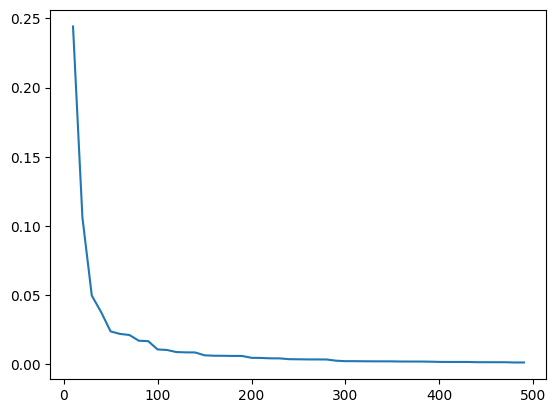

In [13]:
fig, ax = plt.subplots()

n = len(df_retail)
xc = np.arange(10, 500, 10)
acc = np.array([len(df_retail[df_retail.Quantity > x])/n for x in xc])
ax.plot(xc, acc)

plt.show()

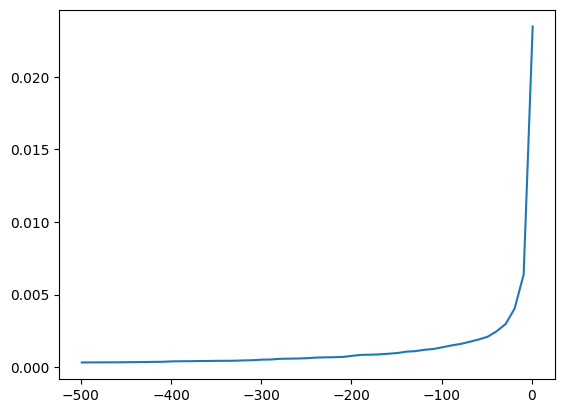

In [14]:
fig, ax = plt.subplots()

xc = np.arange(1, -500, -10)
acc = np.array([len(df_retail[df_retail.Quantity < x])/n for x in xc])
ax.plot(xc, acc)

plt.show()

In [15]:
len(df_retail[df_retail.Quantity < 1])/n

0.023457497321399685

In [16]:
len(df_retail[df_retail.Quantity <= 1])/n

0.3015333202654431

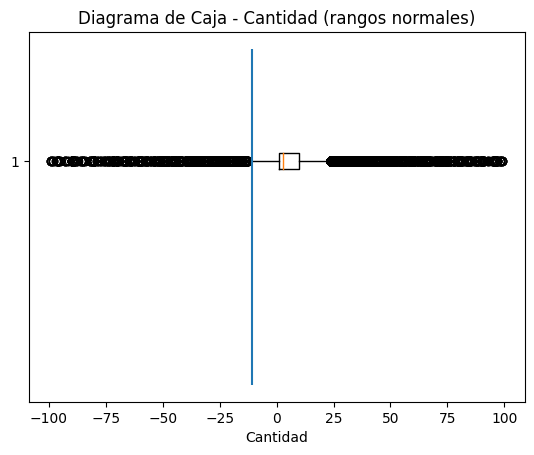

In [105]:
fig, ax = plt.subplots()

ax.boxplot(df_retail[df_retail.Quantity.apply(lambda x: -100 < x < 100)].Quantity, vert=False)
ax.vlines(-11, -1, 2)

plt.title("Diagrama de Caja - Cantidad (rangos normales)")
plt.xlabel("Cantidad")
plt.ylabel("")

plt.show()

In [18]:
len(df_retail[df_retail.Quantity.apply(lambda x: -11 < x < 25)])/n

0.9322956413511183

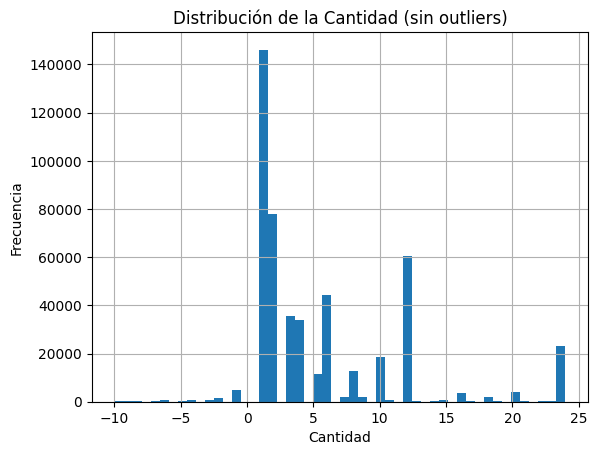

In [106]:
df_retail[df_retail.Quantity.apply(lambda x: -11 < x < 25)].Quantity.hist(bins=50)
plt.title("Distribución de la Cantidad (sin outliers)")
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")
plt.show()

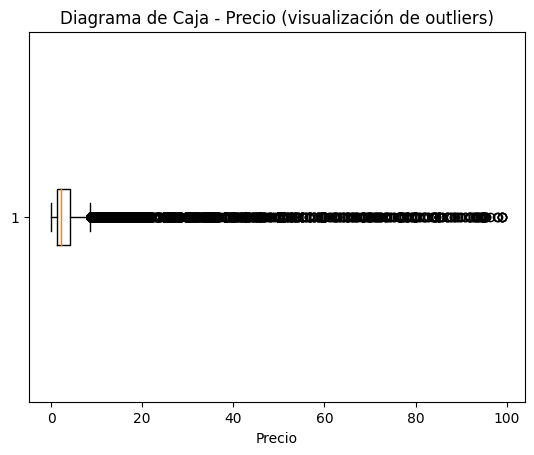

In [107]:
fig, ax = plt.subplots()

ax.boxplot(df_retail[df_retail.Price.apply(lambda x: -100 < x < 100)].Price, vert=False)
plt.title("Diagrama de Caja - Precio (visualización de outliers)")
plt.xlabel("Precio")
plt.ylabel("")

plt.show()

In [21]:
len(df_retail[df_retail.Price.apply(lambda x: 0 < x < 15)])/n

0.9745499666007563

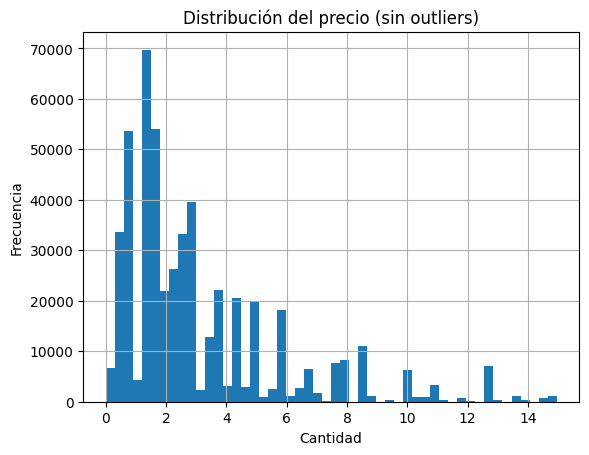

In [108]:
df_retail[df_retail.Price.apply(lambda x: 0 < x < 15)].Price.hist(bins=50)
plt.title("Distribución del precio (sin outliers)")
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")
plt.show()

In [23]:
df_retail[['Quantity', 'Price']].corr()

,Quantity,Price
Quantity,1.000000,-0.001931
Price,-0.001931,1.000000


#### Features

**Colmunas:**
- Invoice: Categórica. Identificador de la compra.
- StockCode: Categórica. Identificador del producto.
- Description: Categórica. Texto. Descripción del producto.
- Quantity: Numérica. Cantidad de compras.
- InvoiceDate: Fecha. Fecha de compra.
- Price: Numérica. Precio de compra.
- Customer ID: Categórica. Identificador del comprador.
- Country: Categórica. País desde donde se compra, o bien al cual se compra.

## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba más de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

> En el análisis univariable se revisa la distribución individual de cada atributo, mientras que en el multivariale se tiene en consideración la distribución conjunta de todos los atributos o subconjuntos de los mismos.Con estos análisis se puede obtener información de los datos como patrones relevantes, outliers o correlaciones. En un análisis de datos faltantes se buscan valores nulos en el dataset, así como sus posibles motivos y soluciones.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [24]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe()])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns = {'count': 'Count'})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [25]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

> Corresponde a una variable númerica continua. El 50% de los datos está entre 1.25 y 4.21, existen 3 valores negativos, que probablemente se deben a errores, el máximo y la desviación estándar son mucho más grandes que los cuartiles 1, 2 y 3, lo que indica la presencia de outliers, la mayoría de los datos están entre 0 y 20, no hay valores faltantes. Se deben eliminar los negativos y se podría usar 20 o 40 como límite para los outliers.

In [26]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

> Corresponde a una variable númerica discreta. El 50% de los datos está entre 1 y 10, el 2.35% de los datos son negativos, el máximo, el mínimo y la desviación estándar son de magnitud mucho más grande que los cuartiles 1, 2 y 3, lo que indica la presencia de outliers, la mayoría de los datos están entre 0 y 100, no hay ceros ni valores faltantes. Considerando que la variable indica el número de compras, lo más probable es que los negativos sean un error, se deberían eliminar los negativos y se podría usar 100 o 200 como límite para los outliers.

In [27]:
profile_serie(df_retail['Invoice'])

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

In [28]:
profile_serie(df_retail['StockCode'])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

In [29]:
profile_serie(df_retail['Description'])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

In [30]:
profile_serie(df_retail['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

In [31]:
profile_serie(df_retail['Country'])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

> Las ocurrencias únicas de Invoice son del orden de 10 veces menos que el total de datos, StockCode, Description y Customer ID del orden de 100 veces. Sólo hay 40 países distintos y la gran mayoría de las compras son de UK. Sólo Customer ID tiene datos faltantes, un 20.54% del total. Las 5 variables son categóricas.

In [32]:
profile_serie(df_retail['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

La variable contiene datos temporales, entre diciembre de 2009 y diciembre de 2010. No hay datos faltantes ni se aprecian errores ni outliers. Se observa que el número de compras sube y baja a lo largo del año, y en general hay menos ventas en enero y más en fin de año, aunque para hacer correctamente este análisis primero se debería agrupar por Invoice.


### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [33]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

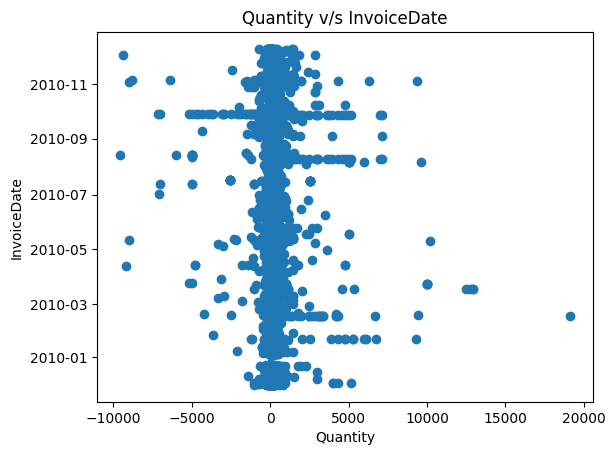

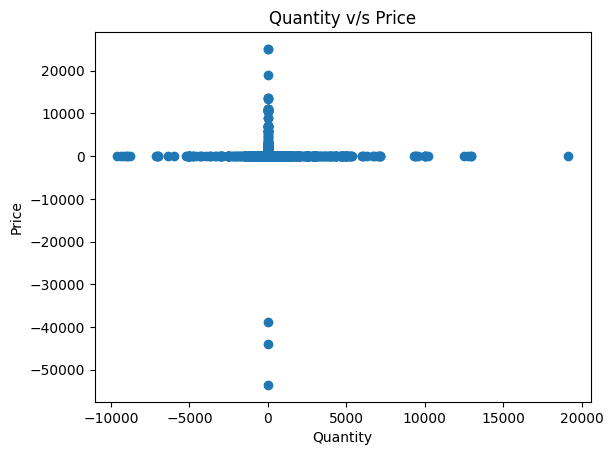

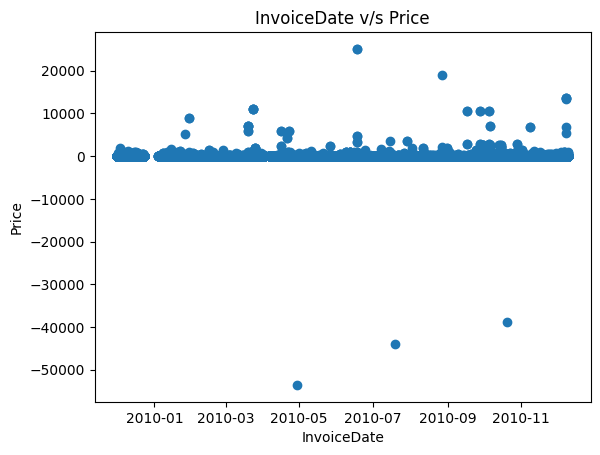

## Correlation:

## Missing Matrix:

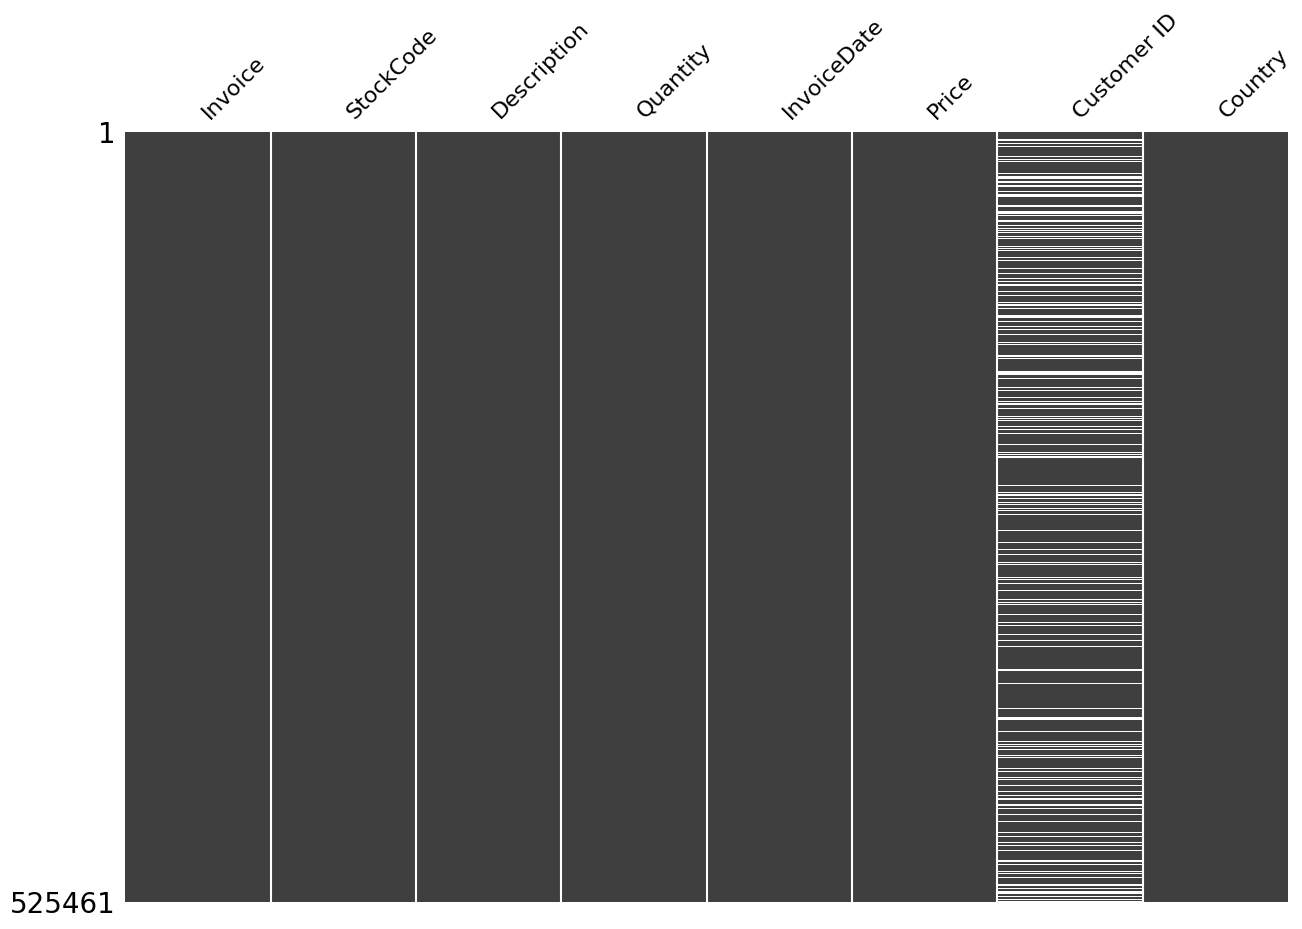

In [34]:
profile_df(df_retail)

Quantity vs InvoiceDate:
- Gracias a este gráfico podemos observar las fechas aproximadas donde se encuentra la cantidad negativa de compras, donde en principio no pareciera haber una fecha especifica donde se concentren, exceptuando en aproximadamente el 2010 - 10.
- Por otro lado se ven las fechas aproximadas donde se encuentran los posibles outliers asociadas a demasiadas ventas.

- Por último, observamos que no pareciera haber un aumento en la concentración de la cantidad de las compras a lo largo de las fechas mostradas

Quantity vs Price

- Observamos 3 cantidades (cercanas a cero) que tienen un precio negativo lo cual es claramente un error
- Existen algunos elementos que tienen un gran precio, sin embargo, una cantidad muy pequeña, lo cual en principio tiene sentido dado que los productos con un gran precio deberían tener una menor cantidad de compras
- En particular, solo los datos que están en el primer cuadrante son válidos, por tanto, los datos en los demás cuadrantes pueden consierarse como outliers

Quantity vs Cosyumer ID

- Gracias a este gráfico puede observarse que algunas identificaciones están asociadas a una cantidad de compras negativa (errores u outliers) o compras demasiado altas (outliers)

InvoiceDate vs Price

- A primera vista pareciera haber 3 fechas asociadas a precios negativos (datos erroneos), que corresponde con el gáfico de Quantity vs Price.

InvoiceDate vs Cosyumer ID

- Lo mas importante de este gráfico es la franja que se observa alrededor de la fecha 2010-01, donde no se observa ningún costumer ID, a diferencia de todas las demás fechas.

Price vs Costumer ID

- Lo que ams resalta son los posibles outliers en asociados al eje Price que se escapan de la notoria concentración a la izquierda

Matriz de correlación

Puede observarse que todos los valores de correlación tienen valores muy cercanos a cero (exceptuando las correlaciones entre mismas variables), esto quiere decir que no hay una asociación lineal clara entre las variables. Sin embargo, es posible que aún exista una relación no lineal o una dependencia compleja entre las variables que no se refleja en la correlación de Pearson

Missing Matrix
- Se observa una gran cantidad de datos faltantes en customer ID, sin embargo, en principio estos datos podrían no tener una aplicación clara, por lo cual podría ser innecesario eliminar estas filas


### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [35]:
#Primero eliminemos los duplicados

df = df_retail.drop_duplicates()

# Imprimir el DataFrame resultante sin filas duplicadas
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [37]:
#  Veamos cuantas filas duplicadas se eliminaron
filas_antes = df_retail.shape[0]

# Contar el número de filas después de eliminar duplicados
filas_despues = df.shape[0]

# Calcular el número de filas eliminadas
filas_eliminadas = filas_antes - filas_despues

# Imprimir el número de filas eliminadas
print(f"Número de filas eliminadas: {filas_eliminadas}")

Número de filas eliminadas: 6865


In [51]:
# Ahora, nos gustaría saber el comportamiento de el dataset para los cuales costumer ID solo posee nulos

# Extraer un DataFrame con las filas donde "CustomerID" es nulo
df_IDnulos = df[df["Customer ID"].isnull()]

# Imprimir el DataFrame resultante
df_IDnulos.shape

(107833, 8)

In [52]:
df_IDnulos

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,nan,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,nan,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,nan,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,nan,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


Apliquemos el analisis multivariado a este nuevo dataframe sin duplicados y otro para las filas con valores nulos en customer ID

## Bivariant Analysis:

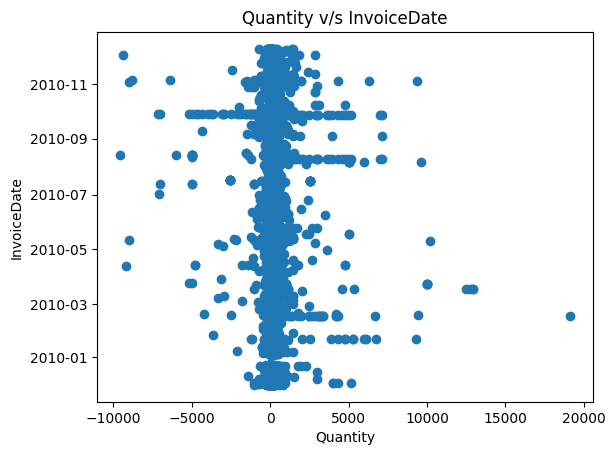

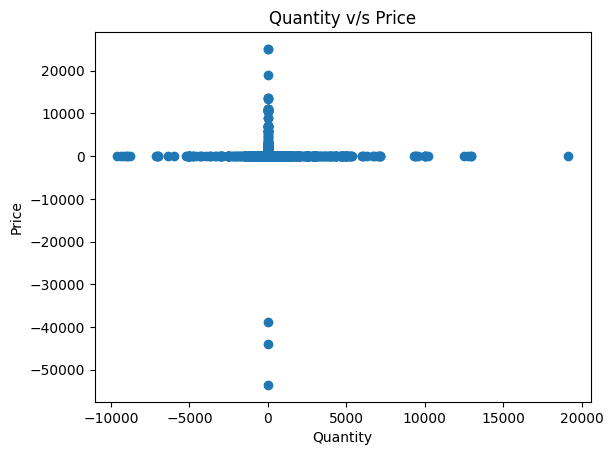

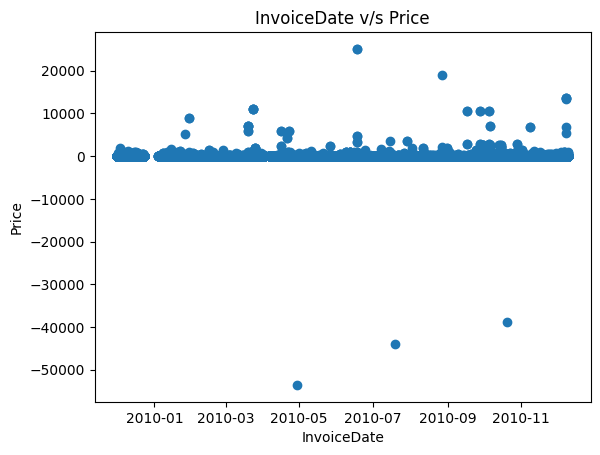

## Correlation:

## Missing Matrix:

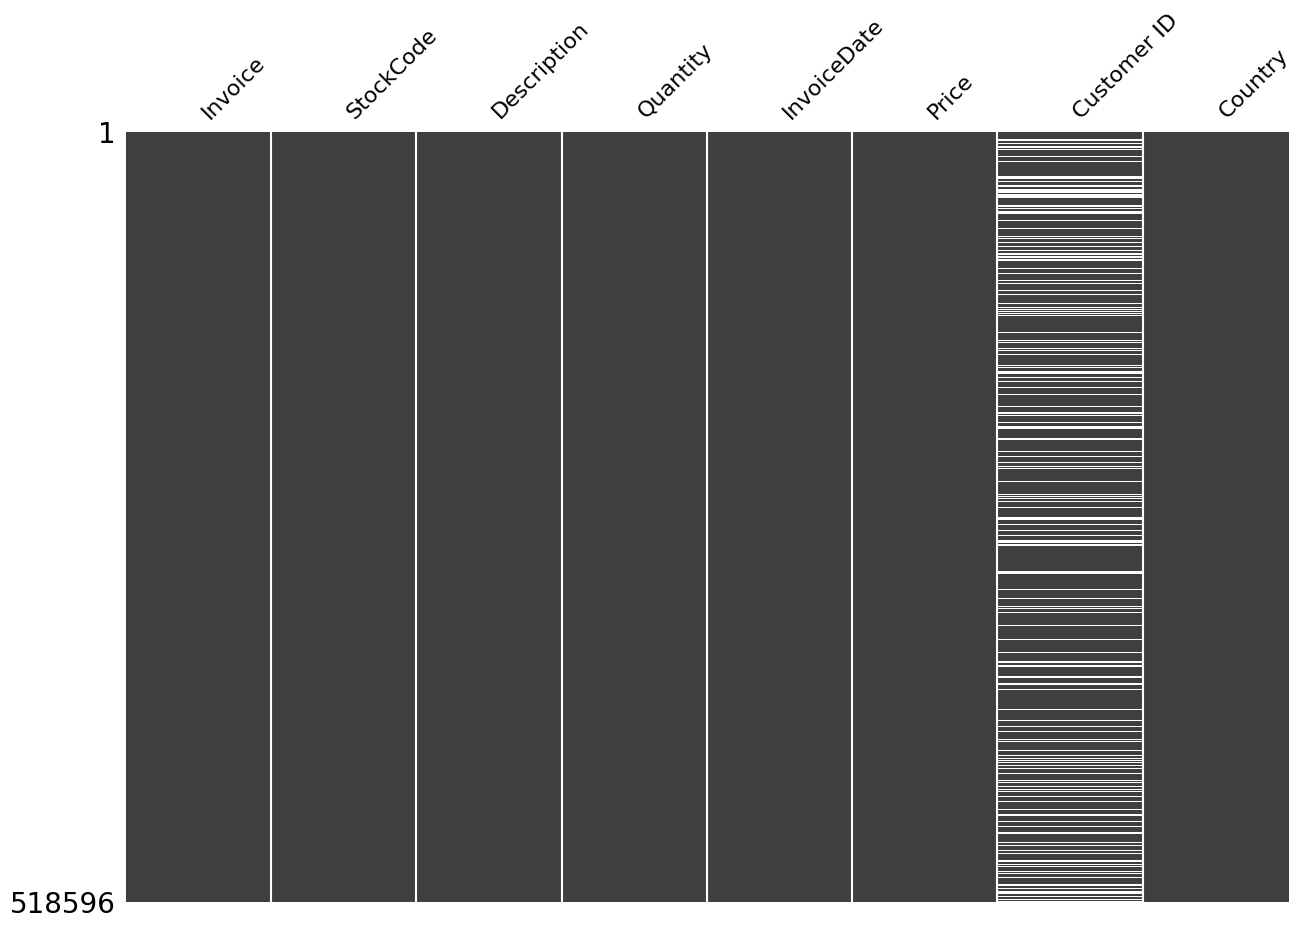

In [54]:
profile_df(df)

## Bivariant Analysis:

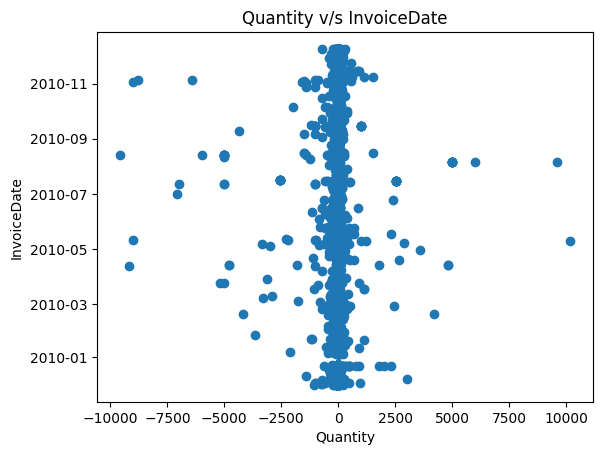

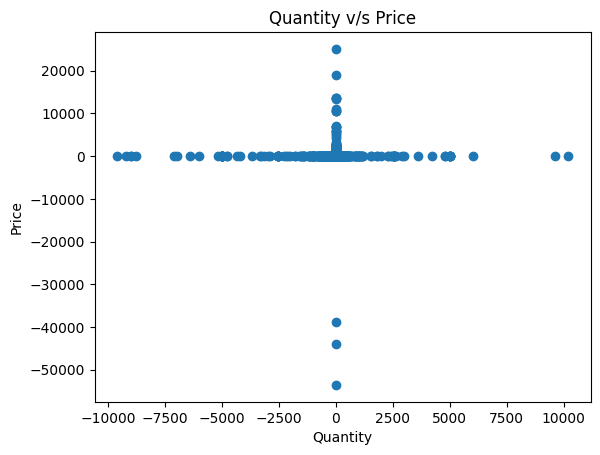

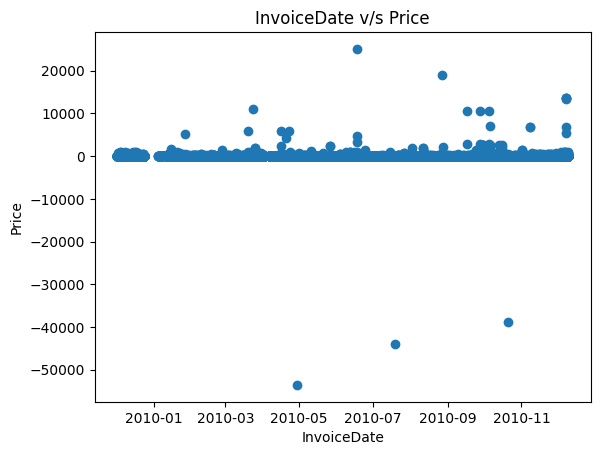

## Correlation:

## Missing Matrix:

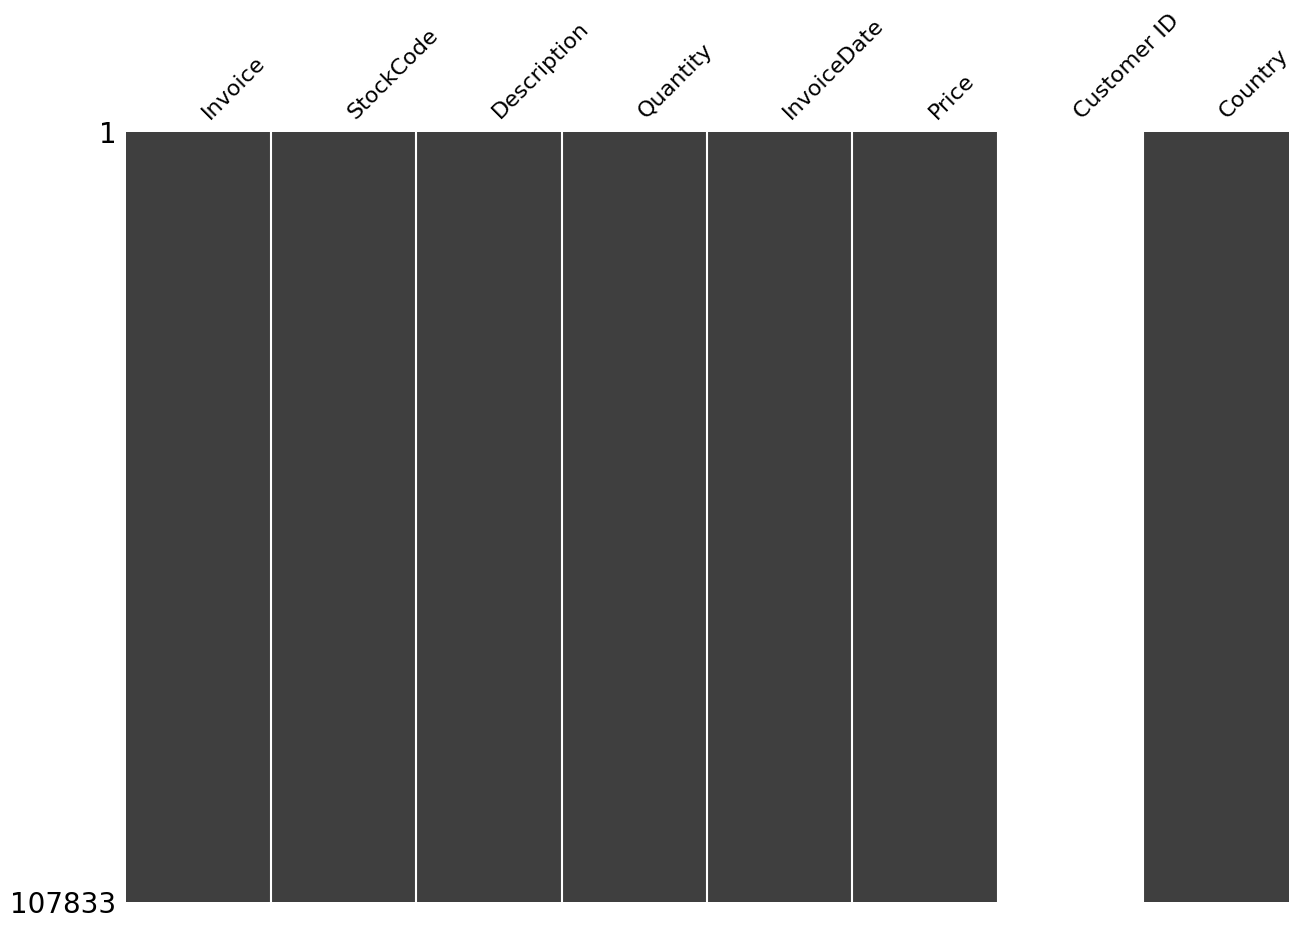

In [53]:
profile_df(df_IDnulos)

De esta forma, dado que no se encuentra algo problemático en las filas asociadas a valores nulos en customer ID (solo lo que ya se mencionó), en principio no se eliminarán aquellas filas

Ahora pasamos a eliminar los ouliers, esto se hará particularmente para price y para Quantity

In [57]:

# Filtrar las filas de "Price" y "Quantity"
filtro_price = (df["Price"] >= 0) & (df["Price"] <= 122.3)
filtro_quantity = (df["Quantity"] >= 0) & (df["Quantity"] <= 100)
df_filtrado = df[filtro_price & filtro_quantity]

# Imprimir el DataFrame filtrado
df_filtrado

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [58]:
#Veamos cuantas filas duplicadas se eliminaron
filas_antes = df_retail.shape[0]

# Contar el número de filas después de eliminar duplicados
filas_despues = df_filtrado.shape[0]

# Calcular el número de filas eliminadas
filas_eliminadas = filas_antes - filas_despues

# Imprimir el número de filas eliminadas
print(f"Número de filas eliminadas: {filas_eliminadas}")

Número de filas eliminadas: 25366


Veamos por ultima vez el analisis multivariable para este nuevo dataframe filtraado

## Bivariant Analysis:

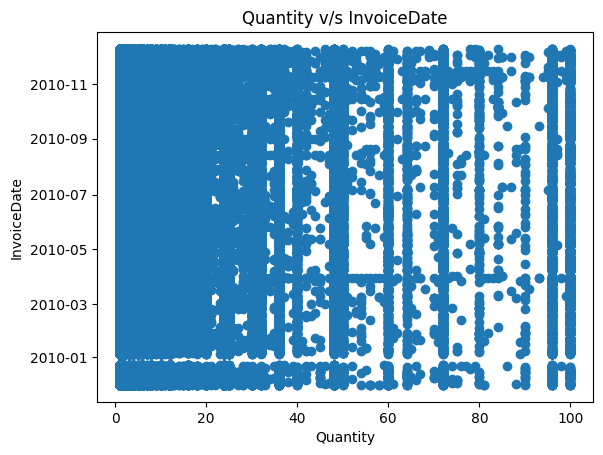

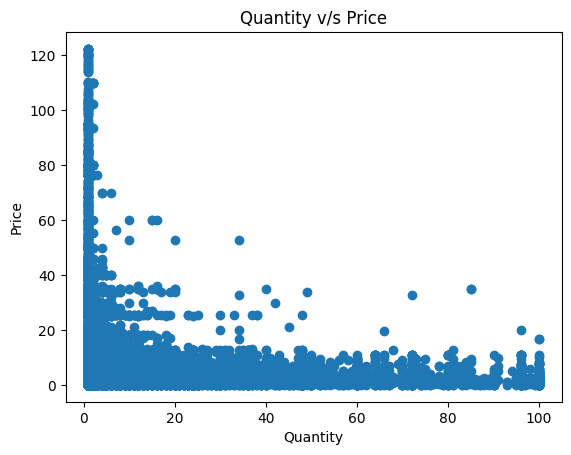

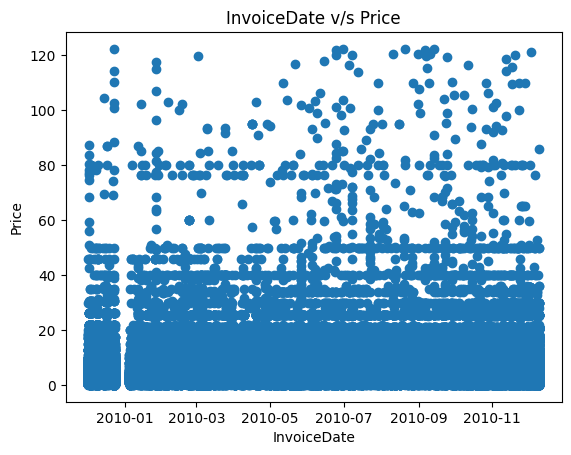

## Correlation:

## Missing Matrix:

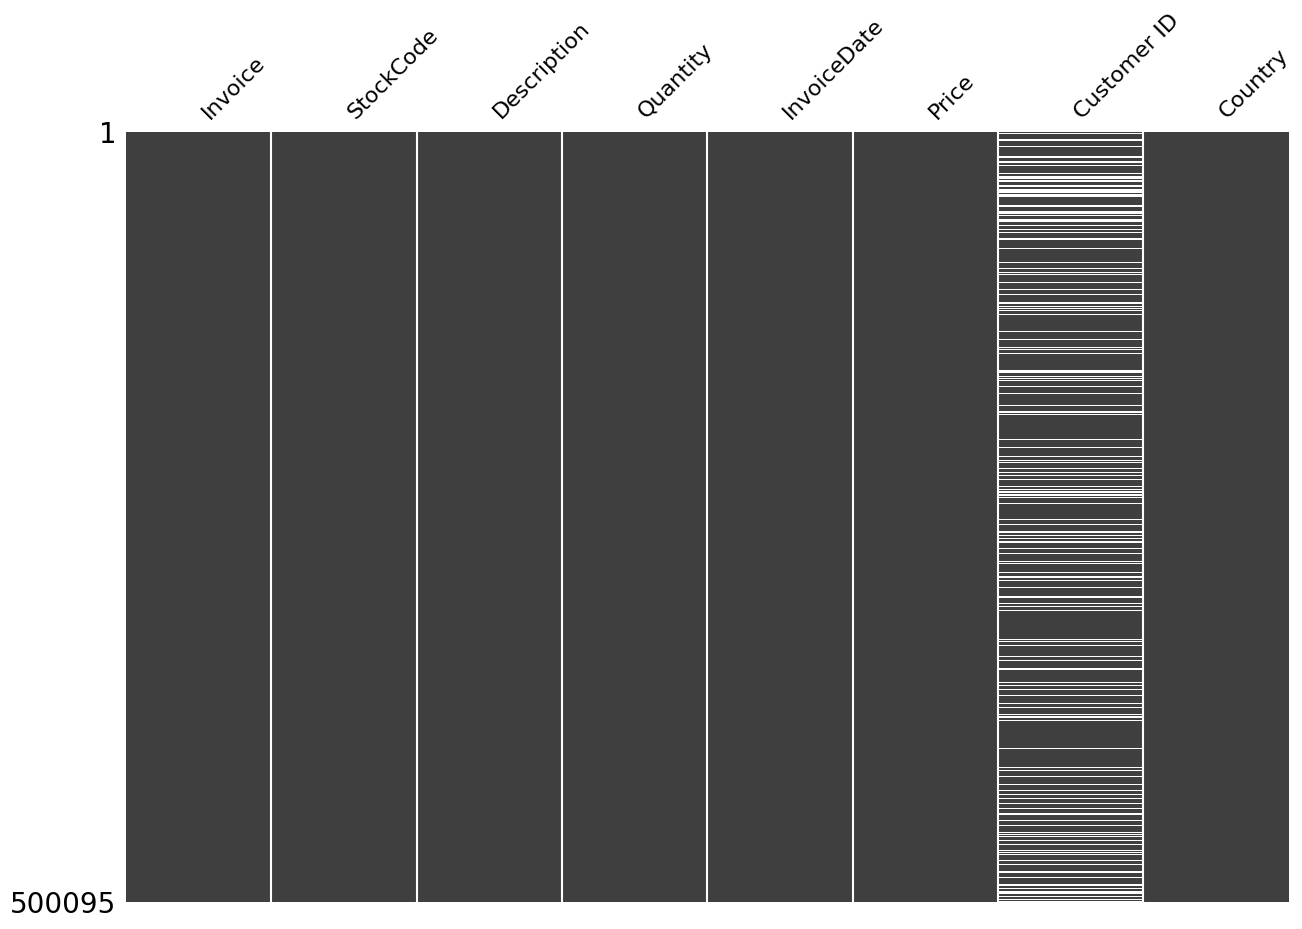

In [59]:
profile_df(df_filtrado)

TODO MUY BONITO :D (en caso de ser necesario siempre puede hacerse algo con los nulos en customer ID pero por ahora no es necesario ya que no requiere de analisis o conslusiones al respecto)

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [96]:
import plotly.express as px

# 1. Calcular las ganancias por producto
df_filtrado["Revenue"] = df_filtrado["Price"] * df_filtrado["Quantity"]
ganancias_por_producto = df_filtrado.groupby("StockCode")["Revenue"].sum().sort_values(ascending=False)

# 2. Seleccionar los 30 productos principales
top_30_productos = ganancias_por_producto.head(30)

df_top_30_productos = pd.DataFrame({"StockCode": top_30_productos.index, "Top 30": top_30_productos.values})


<ipython-input-96-ef1c06ba1400>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
import plotly.graph_objects as go

# Crear el gráfico de barras utilizando Plotly con "StockCode" como variable categórica
fig = go.Figure(data=go.Bar(x=df_top_30_productos["StockCode"], y=df_top_30_productos["Top 30"]))

fig.update_layout(
    title="Ingresos/Cantidades por Producto",
    xaxis_title="Producto",
    yaxis_title="Ingresos/Cantidades",
    xaxis={'type': 'category'},  # Establecer "StockCode" como variable categórica
)

fig.show()


Observando el gráfico de "100 Most common categories of StockCode" Se observa que los productos mas vendidos no son necesariamente los que generan mas ganancia, esto dado que podría existir un producto muy vendido pero cuyo precio es bajo, sin embargo, en algunos casos si coinciden.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [109]:
# Ventas según invoice
def plot_ventas(dataframe):
    d = dataframe.groupby('Invoice').InvoiceDate.apply(np.mean).apply(lambda y: y.normalize())
    x, y = np.unique(d.to_numpy(), return_counts=True)

    fig = px.line(pd.DataFrame({'Fecha':x, 'Ventas':y}), x='Fecha', y='Ventas', title='Ventas respecto al tiempo')

    fig.show()

In [110]:
plot_ventas(df_retail)

> Se asemeja a una señal sinusoidal con ruido. En los últimos meses del añon aumentan las ventas.

In [111]:
# Ventas según quantity
def plot_ventas_2(df):
  df['day'] = df.InvoiceDate.apply(lambda y: y.normalize())
  d = df.groupby('day').Quantity.apply(np.sum)

  fig = px.line(pd.DataFrame(d).reset_index(), x='day', y='Quantity', title='Ventas respecto al tiempo')

  fig.show()

In [112]:
plot_ventas_2(df_retail)

En este gráfico pueden observarse algunos comportamientos extraños, or ejemplo entre septiembre del 2010 y noviembre del 2010, donde valores suben y bajan demasiado. Cabe destacar que cualquier valor que baje del 0 es un error en el dato (ouliers sin duda), mientras que los valores demasiado altos podrían (según el analisis estadistico) corresponder a ouliers.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>